ANN model to predict whether a customer will churn or not

In [122]:
import pandas as pd

In [151]:
data = pd.read_csv("F:\A6_Datasets\Churn_Modelling.csv")

In [156]:
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [157]:
data.drop(['RowNumber'],axis=1 , inplace =True)


In [158]:
data.drop(['CustomerId'],axis=1, inplace= True)

In [159]:
data.drop(['Surname'],axis=1, inplace= True)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [161]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [162]:
data.Gender = data.Gender.replace('Male' , 1)
data.Gender = data.Gender.replace('Female',0)

In [163]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


We will also do one hot encoding for Geography to avoid dummy variable trap

In [164]:
from sklearn.preprocessing import OneHotEncoder

In [165]:
data['Geography'].nunique()

3

In [166]:
data['Geography'] = lb.fit_transform(data['Geography'])

In [135]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [142]:
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='count'>

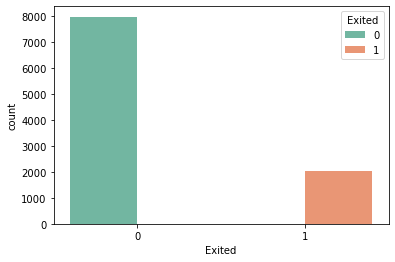

In [167]:
sns.countplot(x= data.Exited ,palette = "Set2",data =data ,hue = "Exited")

<AxesSubplot:xlabel='Geography', ylabel='count'>

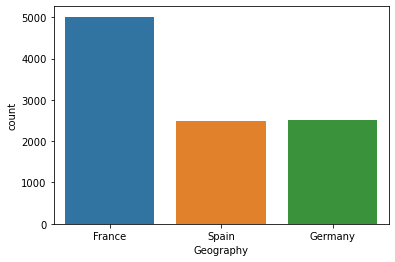

In [153]:
sns.countplot(x= data.Geography)

C:\Users\Anjali\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='Exited'>

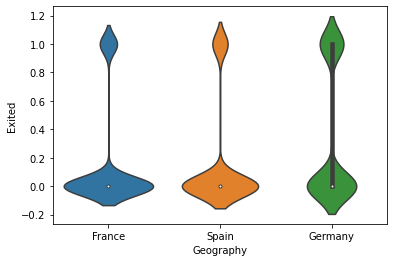

In [155]:
sns.violinplot(data.Geography , data.Exited)

In [168]:

x = data.iloc[:,:10]
y = data.iloc[:,-1]

In [169]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


 Splitting the dataset into the Training set and Test set

In [176]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

Feature Scaling
lots of high computation to ease calculation, we don't want one independent variable dominating

In [177]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(X_train)
xtest = sc.transform(X_test)

In [178]:
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Dropout,Flatten
from keras.utils import np_utils

In [179]:
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
model = Sequential()
model.add(Dense(32,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(xtrain.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [181]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [182]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(xtrain, ytrain, batch_size=128, epochs=100, verbose=1, validation_data=(xtest, ytest))
loss, accuracy = model.evaluate(xtest,ytest, verbose=0)


Epoch 1/100
63/63 [==============================] - 5s 30ms/step - loss: 0.5837 - accuracy: 0.7691 - val_loss: 0.5169 - val_accuracy: 0.7975
Epoch 2/100
63/63 [==============================] - 1s 15ms/step - loss: 0.5032 - accuracy: 0.7960 - val_loss: 0.4965 - val_accuracy: 0.7975
Epoch 3/100
63/63 [==============================] - 1s 15ms/step - loss: 0.4941 - accuracy: 0.7960 - val_loss: 0.4918 - val_accuracy: 0.7975
Epoch 4/100
63/63 [==============================] - 1s 16ms/step - loss: 0.4899 - accuracy: 0.7960 - val_loss: 0.4877 - val_accuracy: 0.7975
Epoch 5/100
63/63 [==============================] - 1s 14ms/step - loss: 0.4859 - accuracy: 0.7960 - val_loss: 0.4832 - val_accuracy: 0.7975
Epoch 6/100
63/63 [==============================] - 1s 14ms/step - loss: 0.4816 - accuracy: 0.7960 - val_loss: 0.4786 - val_accuracy: 0.7975
Epoch 7/100
63/63 [==============================] - 1s 15ms/step - loss: 0.4771 - accuracy: 0.7960 - val_loss: 0.4737 - val_accuracy: 0.7975
Epoch 

In [183]:
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Loss : 0.350436806678772
Accuracy :85.65000295639038
